In [ ]:
# Carregando Bibliotecas
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Importa o classificador de árvore de decisão
from sklearn import metrics #Importa métrica para calcular acurácia - módulo do scikit-learn
from sklearn.model_selection import train_test_split

Analises referentes a Questão 2

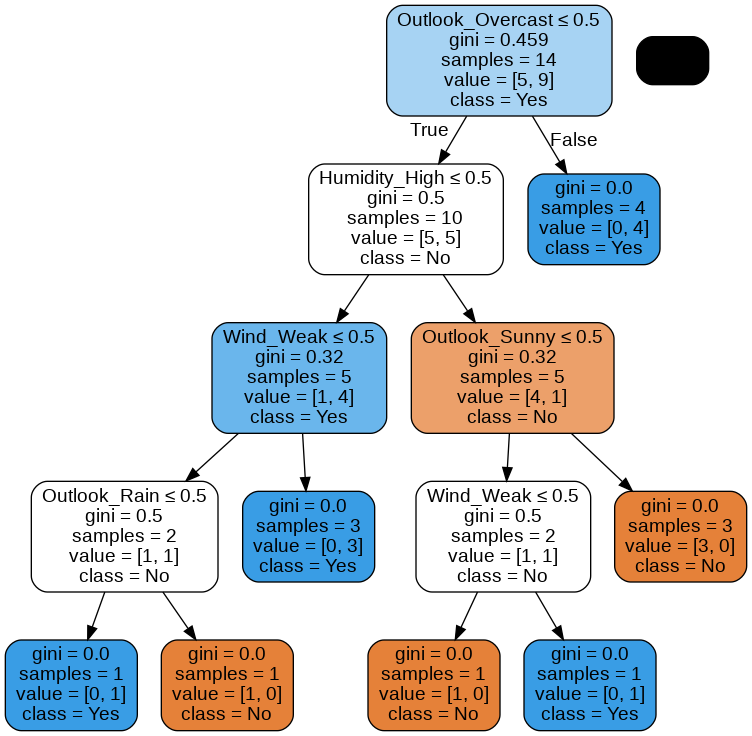

In [ ]:

clf_g = DecisionTreeClassifier(criterion="gini")
clf_g = clf_g.fit(dataset_completo, y)
dot_data = StringIO()
export_graphviz(clf_g, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = dataset_completo.columns,class_names=['No','Yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('arvore1.png')
Image(graph.create_png())

In [ ]:
y_previsto= clf_g.predict(dataset_completo)
print("Acurácia:",metrics.accuracy_score(y, y_previsto))

Acurácia: 1.0


Valor igual a 1 uma vez que todas as instâncias de treino são usadas.

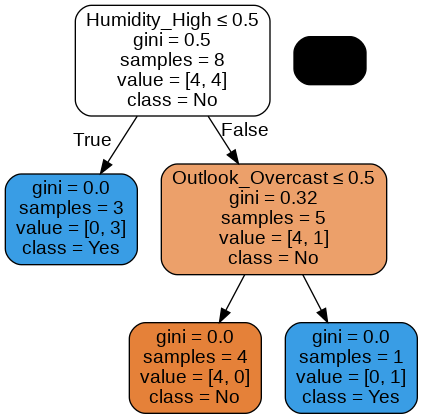

In [ ]:
clf_ga= DecisionTreeClassifier(criterion="gini")
X3_treino, X3_teste, Y3_treino, Y3_teste = train_test_split(dataset_completo, y, test_size=0.4, train_size=0.6)
clf_ga= clf_ga.fit(X3_treino, Y3_treino)
dot_data = StringIO()
export_graphviz(clf_ga, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X3_treino.columns,class_names=['No','Yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('arvore2.png:')
Image(graph.create_png())

In [ ]:
y_previsto_teste3 = clf_ga.predict(X3_teste)
y_previsto_treino3 = clf_ga.predict(X3_treino)
print("Acurácia obtida no teste: ",metrics.accuracy_score(Y3_teste, y_previsto_teste3))
print("Acurácia obtida no treinamento: ",metrics.accuracy_score(Y3_treino, y_previsto_treino3))

Acurácia obtida no teste:  0.6666666666666666
Acurácia obtida no treinamento:  1.0


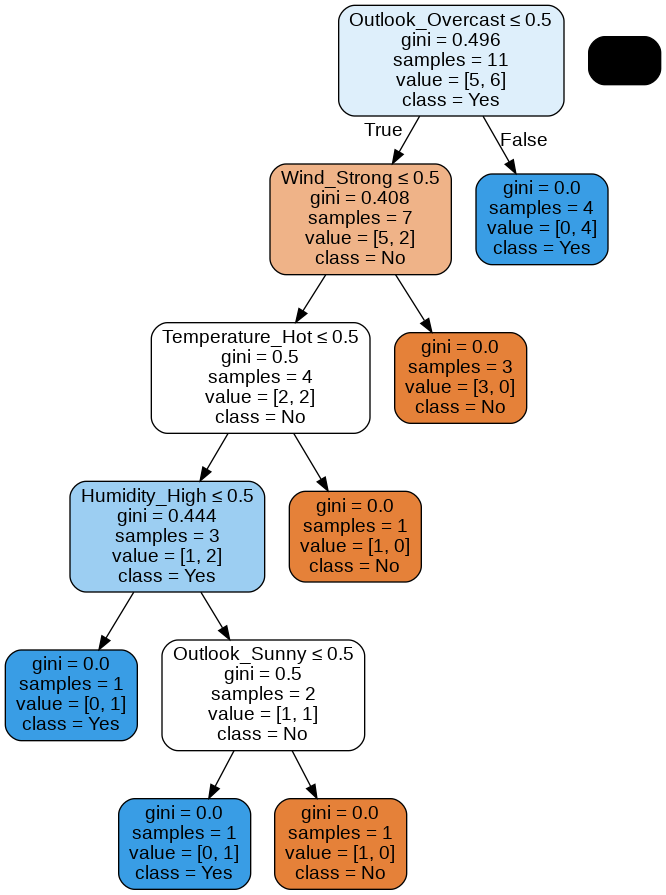

In [ ]:
# Gini 80%-20%
X4_treino, X4_teste, Y4_treino, Y4_teste = train_test_split(Xone_hot_data, y, test_size=0.2, train_size=0.8)
clf_gb= DecisionTreeClassifier(criterion="gini")
clf_gb= clf_gb.fit(X4_treino, Y4_treino)
dot_data = StringIO()
export_graphviz(clf_gb, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X4_treino.columns,class_names=['No','Yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('arvore3.png:')
Image(graph.create_png())

In [ ]:
y_previsto_teste4 = clf_gb.predict(X4_teste)
y_previsto_treino4 = clf_gb.predict(X4_treino)
print("Acurácia obtida no teste: ",metrics.accuracy_score(Y4_teste, y_previsto_teste4))
print("Acurácia obtida no treinamento: ",metrics.accuracy_score(Y4_treino, y_previsto_treino4))

Acurácia obtida no teste:  0.6666666666666666
Acurácia obtida no treinamento:  1.0


Execuções para 60/40

* 0.8333333333333334

* 0.6666666666666666

* 0.5

* 0.3333333333333333

* 0.6666666666666666

Agora para 80/20

* 0.6666666666666666

* 1.0

* 0.6666666666666666

* 1.0

* 0.6666666666666666



Analises referentes a Questão 3

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
foldNum = 3
kf = KFold(n_splits=foldNum)
T =  Xone_hot_data.to_numpy()
acuracias=[None]*3
i=0
soma=0
clfk3 = DecisionTreeClassifier(criterion="entropy")
for train_index, test_index in kf.split(T):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = T[train_index], T[test_index]
  Y_train, Y_test = y[train_index], y[test_index]
  clfk3 = clfk3.fit(X_train, Y_train)
  y_previsto = clfk3.predict(X_test)
  a = metrics.accuracy_score(Y_test, y_previsto)
  acuracias[i]=a
  soma+=a
  i+=1
media =soma/3
#print(acuracia)
print("media: ",media)

TRAIN: [ 5  6  7  8  9 10 11 12 13] TEST: [0 1 2 3 4]
TRAIN: [ 0  1  2  3  4 10 11 12 13] TEST: [5 6 7 8 9]
TRAIN: [0 1 2 3 4 5 6 7 8 9] TEST: [10 11 12 13]
media:  0.7833333333333333


In [ ]:
import numpy as np
from sklearn.model_selection import KFold
foldNum = 8
kf = KFold(n_splits=foldNum)
T =  Xone_hot_data.to_numpy()
acuracias=[None]*8
i=0
soma=0
clfk4 = DecisionTreeClassifier(criterion="entropy")
for train_index, test_index in kf.split(T):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = T[train_index], T[test_index]
  Y_train, Y_test = y[train_index], y[test_index]
  clfk4 = clfk4.fit(X_train, Y_train)
  y_previsto = clfk4.predict(X_test)
  a = metrics.accuracy_score(Y_test, y_previsto)
  acuracias[i]=a
  soma+=a
  i+=1
media =soma/8
print("media: ",media)

TRAIN: [ 2  3  4  5  6  7  8  9 10 11 12 13] TEST: [0 1]
TRAIN: [ 0  1  4  5  6  7  8  9 10 11 12 13] TEST: [2 3]
TRAIN: [ 0  1  2  3  6  7  8  9 10 11 12 13] TEST: [4 5]
TRAIN: [ 0  1  2  3  4  5  8  9 10 11 12 13] TEST: [6 7]
TRAIN: [ 0  1  2  3  4  5  6  7 10 11 12 13] TEST: [8 9]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 12 13] TEST: [10 11]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 13] TEST: [12]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12] TEST: [13]
media:  0.6875


In [ ]:
import numpy as np
from sklearn.model_selection import KFold
foldNum = 14
kf = KFold(n_splits=foldNum)
T =  Xone_hot_data.to_numpy()
acuracias=[None]*14
i=0
soma=0
clfk5 = DecisionTreeClassifier(criterion="entropy")
for train_index, test_index in kf.split(T):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = T[train_index], T[test_index]
  Y_train, Y_test = y[train_index], y[test_index]
  clfk5 = clfk5.fit(X_train, Y_train)
  y_previsto = clfk5.predict(X_test)
  a = metrics.accuracy_score(Y_test, y_previsto)
  acuracias[i]=a
  soma+=a
  i+=1
media =soma/14
print("media: ",media)

TRAIN: [ 1  2  3  4  5  6  7  8  9 10 11 12 13] TEST: [0]
TRAIN: [ 0  2  3  4  5  6  7  8  9 10 11 12 13] TEST: [1]
TRAIN: [ 0  1  3  4  5  6  7  8  9 10 11 12 13] TEST: [2]
TRAIN: [ 0  1  2  4  5  6  7  8  9 10 11 12 13] TEST: [3]
TRAIN: [ 0  1  2  3  5  6  7  8  9 10 11 12 13] TEST: [4]
TRAIN: [ 0  1  2  3  4  6  7  8  9 10 11 12 13] TEST: [5]
TRAIN: [ 0  1  2  3  4  5  7  8  9 10 11 12 13] TEST: [6]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 11 12 13] TEST: [7]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 11 12 13] TEST: [8]
TRAIN: [ 0  1  2  3  4  5  6  7  8 10 11 12 13] TEST: [9]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 11 12 13] TEST: [10]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 12 13] TEST: [11]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 13] TEST: [12]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12] TEST: [13]
media:  0.5714285714285714


De forma peculiar, o aumento do número de folds parece diminuir a precisão.